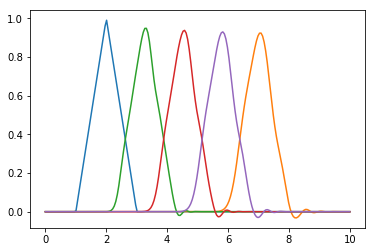

In [20]:
import numpy as np
import matplotlib.pyplot as plt

a = 1 / 2

h = 0.05
cfl = 0.5  #  Число Куранта
t = h * cfl / a
m = int(10 / h)
n = 200

x = np.linspace(0, 10, m)
u = np.zeros((m, n))
#print(x)
#print(u)

#for i in x:
#    if(i < 1):
#        u[i, 0] = 0
#    elif(i >= 1):
#        u[i, 0] = i[i >= 1] - 1
#    elif(i >= 2):
#        u[i, 0] = 3 - i[i >= 2]
#    else:
#        u[i, 0] = 0
        
u[x < 1, 0] = 0
u[x >= 1, 0] = x[x >= 1] - 1
u[x >= 2, 0] = 3 - x[x >= 2]
u[x >= 3] = 0
#print(u)

"""
  Разностная схема, построенная методом неопределенных коэффициентов на шаблоне по 4 точкам:

                * m n+1
                |
  *m-2 n *m-1 n * m n
  
  Берем данные точки шаблона, так как а > 0.
  
"""

for j in range(n - 1):
    for i in range(2, m + 2):
        if (i == m):
            u[0, j + 1] = u[0, j] - cfl * (u[m - 2, j] - 4 * u[m - 1, j] + 3 * u[0, j]) / 2 + \
                cfl**2 * (u[m - 2, j] - 2 * u[m - 1, j] + u[0, j]) / 2
        elif (i == m + 1):
            u[1, j + 1] = u[1, j] - cfl * (u[m - 1, j] - 4 * u[0, j] + 3 * u[1, j]) / 2 + \
                cfl**2 * (u[m - 1, j] - 2 * u[0, j] + u[1, j]) / 2
        else:
            u[i, j + 1] = u[i, j] - cfl * (u[i - 2, j] - 4 * u[i - 1, j] + 3 * u[i, j]) / 2 + \
                cfl**2 * (u[i - 2, j] - 2 * u[i - 1, j] + u[i, j]) / 2
#print(u)
plt.plot(x, u[:, 0], x, u[:, n - 1], x, u[:, int(n / 4)], x, u[:, int(n / 2)], x, u[:, int(3 * n / 4)])
plt.show()